In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.sparse import hstack

In [45]:
df = pd.read_csv('preprocessed_text_news_df.csv')
df_x = pd.read_csv('X.csv')

df_x['title_prep'] = df['title_prep']
df_x['headline_prep'] = df['headline_prep']
df_x['title_headline'] = df['title_headline']
df_x['title_headline'] = df_x['title_prep'] +' '+ df_x['headline_prep']
vectorizer = TfidfVectorizer()
X_th_bow = vectorizer.fit_transform(df_x['title_headline'])

X =df_x[['economy', 'microsoft', 'obama', 'Others',
       'Top_1%', 'Top_20%', 'Top_5%', 'SentimentHeadline', 'SentimentTitle',
       'Publish_weekday']]

Raw_values = scipy.sparse.csr_matrix(X.values)
fea_text_all = hstack([Raw_values,X_th_bow])

In [46]:
y_Link = df_x ['LinkedIn_pop_rank']
y_Face = df_x ['Face_pop_rank']

In [47]:
### 在下面这里换 X是feature-based/ fea_text_all是合并的
### 换y_Face 是facebook的
### 换y_Link 是 linkedin的

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
        fea_text_all,y_Link, train_size=0.7, test_size=0.3, random_state=42, shuffle=True)

In [68]:
# cal_test = X_test[(X_test['Top_5%'] ==1)&(X_test['obama'] ==1)]
# cal_test.head(5)

In [72]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

def draw_roc_curve(y_test, y_proba):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve ')
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.grid(True)
    
    return plt.show()


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def build_logistic_regression(X_train,y_train,X_test,y_test):
    
#     logreg = LogisticRegression()
    logreg = LogisticRegression(class_weight='balanced')
    logreg.fit(X_train,y_train)
    y_pred_train = logreg.predict(X_train)
    y_pred_test = logreg.predict(X_test)
    
    print('Train accuracy score:',accuracy_score(y_train,y_pred_train))
    print('Test accuracy score:', accuracy_score(y_test, y_pred_test))
    
    print(confusion_matrix(y_test, y_pred_test))
    print('Precision score:', precision_score(y_test, y_pred_test))
    print('Recall score:', recall_score(y_test, y_pred_test))
    
    print(logreg.intercept_)
    print(pd.DataFrame(logreg.coef_))


    y_proba=logreg.predict_proba(X_test)[:,1]
    
   
    draw_roc_curve(y_test, y_proba)
     
#     y_proba_cal=logreg.predict_proba(cal_test)[:,1]
#     plt.hist(y_proba_cal)
 
    return plt.show()

In [73]:
# cal_test = X_test[X_test['obama'] == 1]

Train accuracy score: 0.7964233219010289
Test accuracy score: 0.6810972996142306
[[3704 1539]
 [ 693 1063]]
Precision score: 0.40853189853958494
Recall score: 0.6053530751708428
[-1.26486731]
      0         1         2         3         4         5         6      \
0  1.745518  1.511421  0.586655 -0.900881  0.410948 -0.651048 -0.123886   

      7         8        9      ...     27769     27770    27771     27772  \
0  0.083585  0.128284 -0.04386  ... -0.089087  0.200951 -0.09047  0.384752   

      27773  27774     27775  27776     27777     27778  
0 -0.102852    0.0  0.062601    0.0 -0.080657 -0.010834  

[1 rows x 27779 columns]


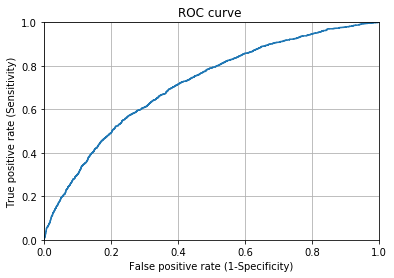

In [74]:

build_logistic_regression(X_train,y_train,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 257.44, 'Predicted label')

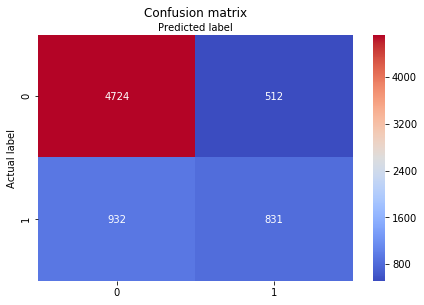

In [10]:
import numpy as np
import seaborn as sns
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
from sklearn.ensemble import RandomForestClassifier
def build_RFC(X_train,y_train,X_test,y_test,X):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    
    y_pred_test = clf.predict(X_test)
    
    y_proba=clf.predict_proba(X_test)[:,1]
    
    draw_roc_curve(y_test, y_proba)
    

    print('Train accuracy score:',accuracy_score(y_train,y_pred_train))
    print('Test accuracy score:', accuracy_score(y_test,y_pred_test))
    print('Precision score:', precision_score(y_test, y_pred_test))
    print('Recall score:', recall_score(y_test, y_pred_test))
    
    y_pred=clf.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1,2,3]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
#     print(clf.coef_)
    
    return pd.crosstab(y_test,pd.Series(y_pred_test),rownames=['ACTUAL'],colnames=['PRED'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


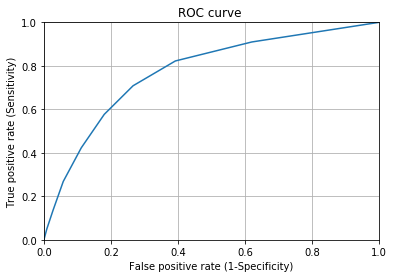

Train accuracy score: 0.9807692307692307
Test accuracy score: 0.7728246892413202
Precision score: 0.6119016817593791
Recall score: 0.2682926829268293


PRED,0,1
ACTUAL,,
0,1521,165
1,353,52


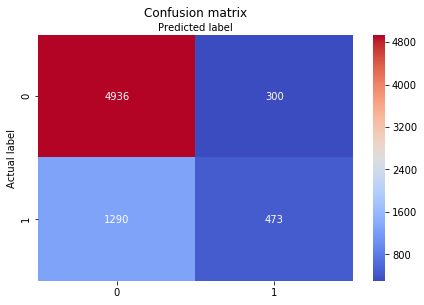

In [12]:
build_RFC(X_train,y_train,X_test,y_test,X)